<a href="https://colab.research.google.com/github/kartiksharma2383/Machine-Learning/blob/main/DBSCAN_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# DBSCAN(Density Based Spatial Clustering of Applications with Noise is an algorithm that groups data points that are closely packed together and marks outliers as noise based on their density in the feature space. It identifies clusters as dense regions in the data space separated by areas of lower density)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [39]:
# make_blobs is a function in the sklearn.datasets module that generates isotropic Gaussian blobs for clustering. It's often used to create synthetic datasets for testing clustering algorithms.
# cluster_std: How closely clusters r bounded to each other.
# eps: Radius of the neighborhood, at this stage no clustering is done yet, therefore eps = eps
x, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.50, random_state = 42)
x = StandardScaler().fit_transform(x)
eps = 0.3 # neighborhood radius
min_samples = 10 # minimum points to form a dense region
db = DBSCAN(eps = eps, min_samples = min_samples).fit(x)

In [40]:
# core_samples_mask: Boolean array that will help us identify which points are core points for visualization or further analysis.
# np.zeros_like(labels, dtype=bool) creates a Boolean array of the same shape as labels but filled with False.
# db.core_sample_indices_: An array of indices of core points detected by DBSCAN.
# len(set(labels)): Total unique labels including noise.
# 1 if -1 in labels else 0: remove the noise label(or negative value) from the count.
# list(labels).count(-1): count the number of noise points detected by DBSCAN
labels = db.labels_
core_samples_mask = np.zeros_like(labels, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

In [41]:
print(f"estimated number of clusters: {n_clusters}")
print(f"estimated number of noise points: {n_noise}")

estimated number of clusters: 4
estimated number of noise points: 0


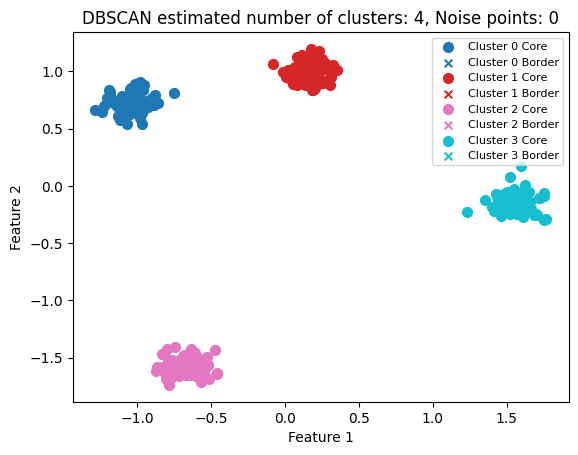

In [42]:
# tab10: Matplotlib colormap with 10 distinct colors.
# np.linspace(0, 1, N): Generates N evenly spaced numbers between 0 and 1.
# len(unique_labels): Number of clusters.
# plt.cm.tab10(...): Takes each number (between 0 and 1) and gives a color from the colormap.
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
  if k == -1:
    col = 'k' # k : clusters
  class_member_mask = (labels == k) # class_member_mask creates a Boolean mask showing which points belong to cluster k.

  # Core = inside the cluster, dense enough to form new connections.
  # Border = on the edge, part of the cluster, but cannot form new ones.
  xy = x[class_member_mask & core_samples_mask] # core_samples_mask creates boolean mask for all core points in the dataset.
  plt.scatter(xy[:,0], xy[:,1], s = 50, c = [col], marker = 'o', label = f'Cluster {k} Core' if k != -1 else 'Noise') # f'Cluster {k} Core': Creates a label like "Cluster 0 Core", "Cluster 1 Core", etc. depending on cluster ID k.
  xy = x[class_member_mask & ~core_samples_mask] # ~core_samples_mask creates boolean mask for all non-core points in the dataset.
  plt.scatter(xy[:,0], xy[:,1], s = 30, c = [col], marker = 'x', label = f'Cluster {k} Border' if k != -1 else '') # f'Cluster {k} Border': Creates a label like "Cluster 0 Border", "Cluster 1 Border", etc.

plt.title(f'DBSCAN estimated number of clusters: {n_clusters}, Noise points: {n_noise}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'best', fontsize = 8) # this command is used to place the legend box(box at right upper corner in output))
plt.show()